In [ ]:
# Importing the Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Rading the CSV Files Path
import pandas as pd
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [ ]:
# Rading the first 5 records
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Checking the number of rows and columns
df.shape

(8807, 12)

In [ ]:
# Summary Infomartion
# This provide the information about non-null values and data types od each columns.
# IT also help to idenetify the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [84]:
# We can gain insights into the numerical attributes such as count,
# mean, standard deviation, minimum, maximum, and quartiles
df.describe()

,release_year,month,year
count,8787.000000,8787.000000,8787.000000
mean,2014.185843,6.654490,2018.872539
std,8.825944,3.435514,1.574439
min,1925.000000,1.000000,2008.000000
25%,2013.000000,4.000000,2018.000000
50%,2017.000000,7.000000,2019.000000
75%,2019.000000,10.000000,2020.000000
max,2021.000000,12.000000,2021.000000


In [ ]:
df.describe(include='O')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [ ]:
# This dataset explores the missing values in each column
# using df. isnull().sum(). We aim to identify the columns with
# missing values and determine the percentage of missing data in each column.
# df.isnull().sum()
df.isnull().sum()/len(df)*100  # checking the percentage of null values in particular column

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [ ]:
# We identify and remove duplicate records using df.duplicated().sum().
df.duplicated().sum()

0

In [ ]:
# Handling Missing Values in Specific Columns
# repalcing the missing value in director and cast with not found
df['director'].replace(np.nan,'Not Found',inplace=True)
df['cast'].replace(np.nan,'Not Found',inplace=True)

In [ ]:
# df.isnull().sum()
df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [ ]:
df['country'].fillna(df['country'].mode()[0],inplace=True)

In [ ]:
# finding mode rating for movie and TV show
movie_rat = df.loc[df['type'] == "Movie",'rating'].mode()[0]
tv_show_rat = df.loc[df['type'] == 'TV Show','rating'].mode()[0]

In [ ]:
df['rating'] = df.apply(lambda x: movie_rat if x['type'] == 'Movie'
                        and pd.isna(x['rating'])
                        else tv_show_rat
                        if x['type'] == 'TV Show'
                        and pd.isna(x['rating'])
                        else x['rating'],axis=1)

In [ ]:
# finding mode rating for movie and TV show
movie_duration = df.loc[df['type'] == "Movie",'duration'].mode()[0]
tv_duration = df.loc[df['type'] == 'TV Show','duration'].mode()[0]

In [ ]:
df['duration'] = df.apply(lambda x: movie_duration if x['type'] == 'Movie'
                        and pd.isna(x['duration'])
                        else tv_duration
                        if x['type'] == 'TV Show'
                        and pd.isna(x['duration'])
                        else x['duration'],axis=1)

In [ ]:
# Dropping Remaining Missing Values
# df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Found,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Not Found,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Not Found,Not Found,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Not Found,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# Date Handling
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df['month'] = df['date_added'].dt.month
df['month_name'] = df['date_added'].dt.month_name()
df['year'] = df['date_added'].dt.year

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month,month_name,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Found,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,Not Found,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month', 'month_name', 'year'],
      dtype='object')

In [ ]:
# Data Transformation: Cast, Country, Listed In, and Director
# splitting and expanding the cast column
df_cast = pd.melt(df['cast'].str.split(",",expand=True),var_name='cast_index',
value_name='cast_new')
df_cast['show_id'] = df['show_id']
df_cast = df_cast.reset_index(drop=True)
df_cast.head()

,cast_index,cast_new,show_id
0,0,Not Found,s1
1,0,Ama Qamata,s2
2,0,Sami Bouajila,s3
3,0,Not Found,s4
4,0,Mayur More,s5


In [ ]:
df_country = pd.melt(df['country'].str.split(",",expand=True),var_name='country_index',
value_name='country_new')
df_country['show_id'] = df['show_id']
df_country = df_country.reset_index(drop=True)
df_country.head()

,country_index,country_new,show_id
0,0,United States,s1
1,0,South Africa,s2
2,0,United States,s3
3,0,United States,s4
4,0,India,s5


In [ ]:
df_listed_in = pd.melt(df['listed_in'].str.split(",",expand=True),var_name='listed_in_index',
value_name='listed_in_new')
df_listed_in['show_id'] = df['show_id']
df_listed_in = df_listed_in.reset_index(drop=True)
df_listed_in.head()

,listed_in_index,listed_in_new,show_id
0,0,Documentaries,s1
1,0,International TV Shows,s2
2,0,Crime TV Shows,s3
3,0,Docuseries,s4
4,0,International TV Shows,s5


In [ ]:
df_director = pd.melt(df['director'].str.split(",",expand=True),var_name='director_index',
value_name='director_new')
df_director['show_id'] = df['show_id']
df_director = df_director.reset_index(drop=True)
df_director.head()

,director_index,director_new,show_id
0,0,Kirsten Johnson,s1
1,0,Not Found,s2
2,0,Julien Leclercq,s3
3,0,Not Found,s4
4,0,Not Found,s5


In [ ]:
# df.head(1)
df.shape

(8797, 15)

In [ ]:
df= df.merge(df_cast,on='show_id',how='left')
df = df.merge(df_country,on='show_id',how='left')
df = df.merge(df_director,on='show_id',how='left')
df = df.merge(df_listed_in,on='show_id',how='left')

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,month_name,year,cast_index,cast_new,country_index,country_new,director_index,director_new,listed_in_index,listed_in_new
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Found,United States,2021-09-25,2020,PG-13,90 min,...,September,2021,0,Not Found,0,United States,0,Kirsten Johnson,0,Documentaries
1,s2,TV Show,Blood & Water,Not Found,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,September,2021,0,Ama Qamata,0,South Africa,0,Not Found,0,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,...,September,2021,0,Sami Bouajila,0,United States,0,Julien Leclercq,0,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,Not Found,Not Found,United States,2021-09-24,2021,TV-MA,1 Season,...,September,2021,0,Not Found,0,United States,0,Not Found,0,Docuseries
4,s5,TV Show,Kota Factory,Not Found,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,...,September,2021,0,Mayur More,0,India,0,Not Found,0,International TV Shows


In [ ]:
df.drop(['cast','country','director','listed_in','cast_index','listed_in_index','country_index','director_index'],axis=1,inplace=True)

In [ ]:
df.head()

,show_id,type,title,date_added,release_year,rating,duration,description,month,month_name,year,cast_new,country_new,director_new,listed_in_new
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",9,September,2021,Not Found,United States,Kirsten Johnson,Documentaries
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",9,September,2021,Ama Qamata,South Africa,Not Found,International TV Shows
2,s3,TV Show,Ganglands,2021-09-24,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,9,September,2021,Sami Bouajila,United States,Julien Leclercq,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,2021-09-24,2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo...",9,September,2021,Not Found,United States,Not Found,Docuseries
4,s5,TV Show,Kota Factory,2021-09-24,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,9,September,2021,Mayur More,India,Not Found,International TV Shows


In [ ]:
df.shape

(8797, 15)

In [ ]:
# Distribution of Content Types
# calculate the percentage distribution of content types


In [ ]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y)*100).round(2)

In [ ]:
mf_ratio = pd.DataFrame(r)

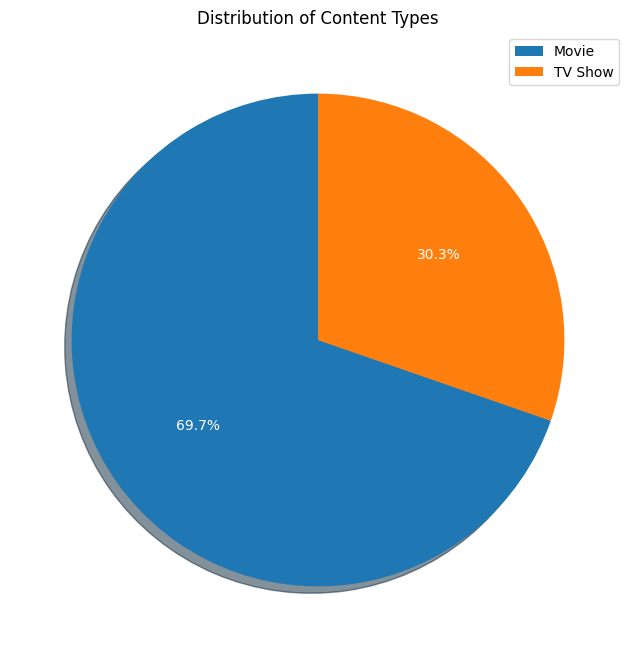

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(mf_ratio['type'],
        labels=mf_ratio.index,
        autopct='%1.1f%%',
        startangle=90,
        shadow=True,textprops={'color':'white'})
plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.show()

In [ ]:

# top 10 countries where netflix is popular
top_10_countries = df['country_new'].value_counts().head(10)

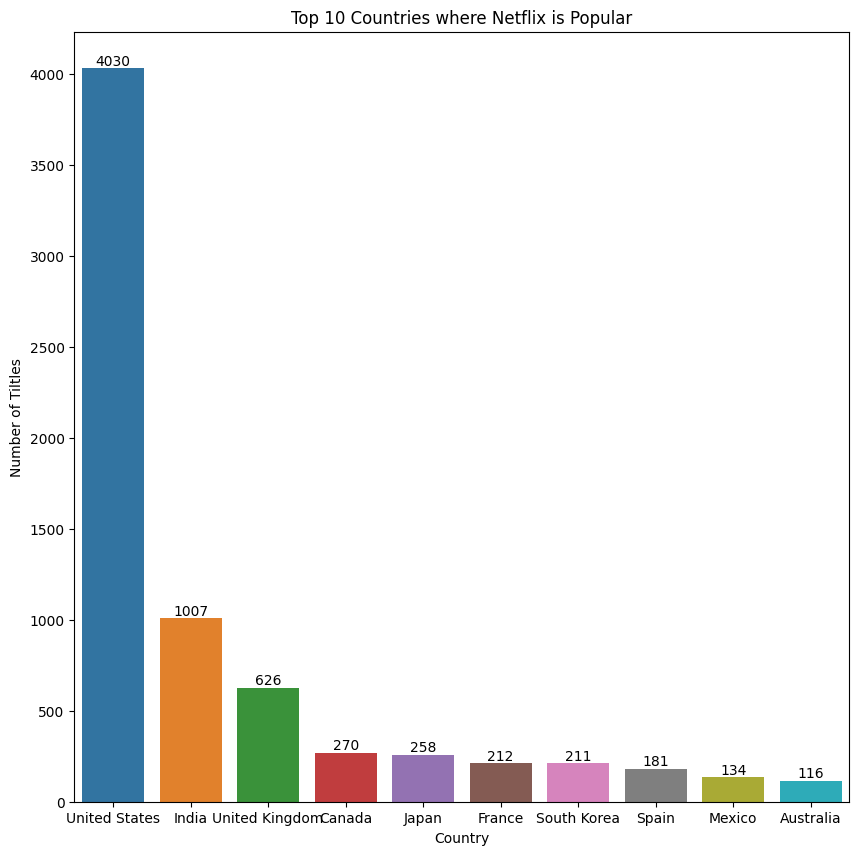

In [ ]:
plt.figure(figsize=(10,10))
bar_plot = sns.barplot(x=top_10_countries.index,y=top_10_countries)
plt.xlabel('Country')
plt.ylabel('Number of Tiltles')
plt.title('Top 10 Countries where Netflix is Popular')

# adding the count the above the bar
for index, value in enumerate(top_10_countries.values):
  bar_plot.text(index,value,str(value),ha='center',va='bottom')


plt.show()

In [ ]:
# top 10 Actors by movie/Tv show count
top_10_cast = df['cast_new'].value_counts()[1:].head(10)

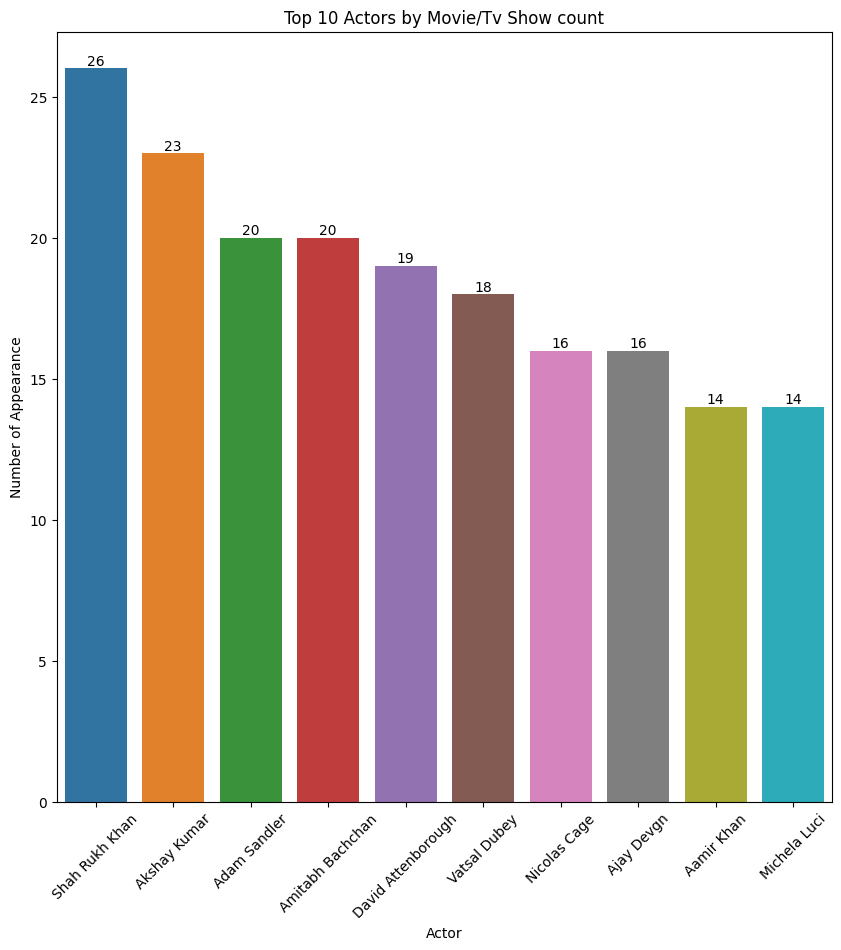

In [ ]:
plt.figure(figsize=(10,10))
bar_plot1 = sns.barplot(x=top_10_cast.index,y=top_10_cast.values)
plt.xticks(rotation=45)
plt.xlabel('Actor')
plt.ylabel('Number of Appearance')
plt.title('Top 10 Actors by Movie/Tv Show count')

for index, value in enumerate(top_10_cast.values):
  bar_plot1.text(index,value,str(value),ha='center',va='bottom')

plt.show()

In [ ]:
# top 10 Directors by movie/Tv show count
top_10_director = df['director_new'].value_counts()[1:].head(10)
# df['director_new'].value_counts().head(10)

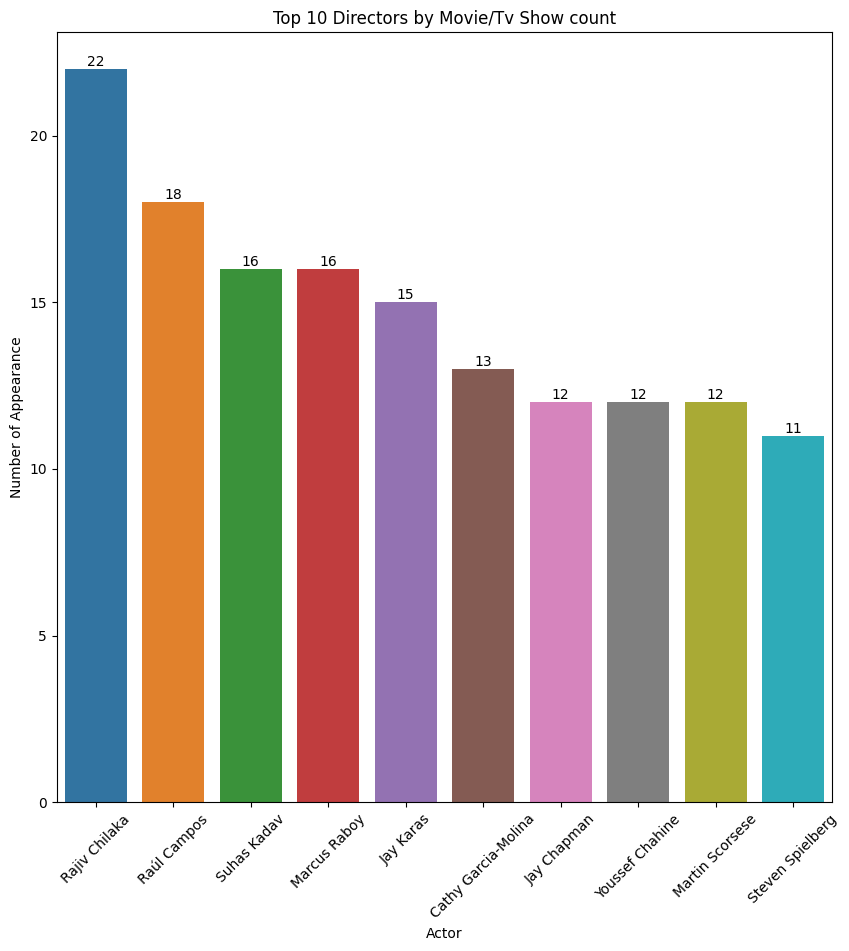

In [ ]:
plt.figure(figsize=(10,10))
bar_plot2 = sns.barplot(x=top_10_director.index,y=top_10_director.values)
plt.xticks(rotation=45)
plt.xlabel('Actor')
plt.ylabel('Number of Appearance')
plt.title('Top 10 Directors by Movie/Tv Show count')

for index, value in enumerate(top_10_director.values):
  bar_plot2.text(index,value,str(value),ha='center',va='bottom')

plt.show()

In [ ]:
# top 10 Categories by movie/Tv show count
top_10_listed = df['listed_in_new'].str.strip().value_counts().head(10)
# df['listed_in_new'].str.strip().value_counts()

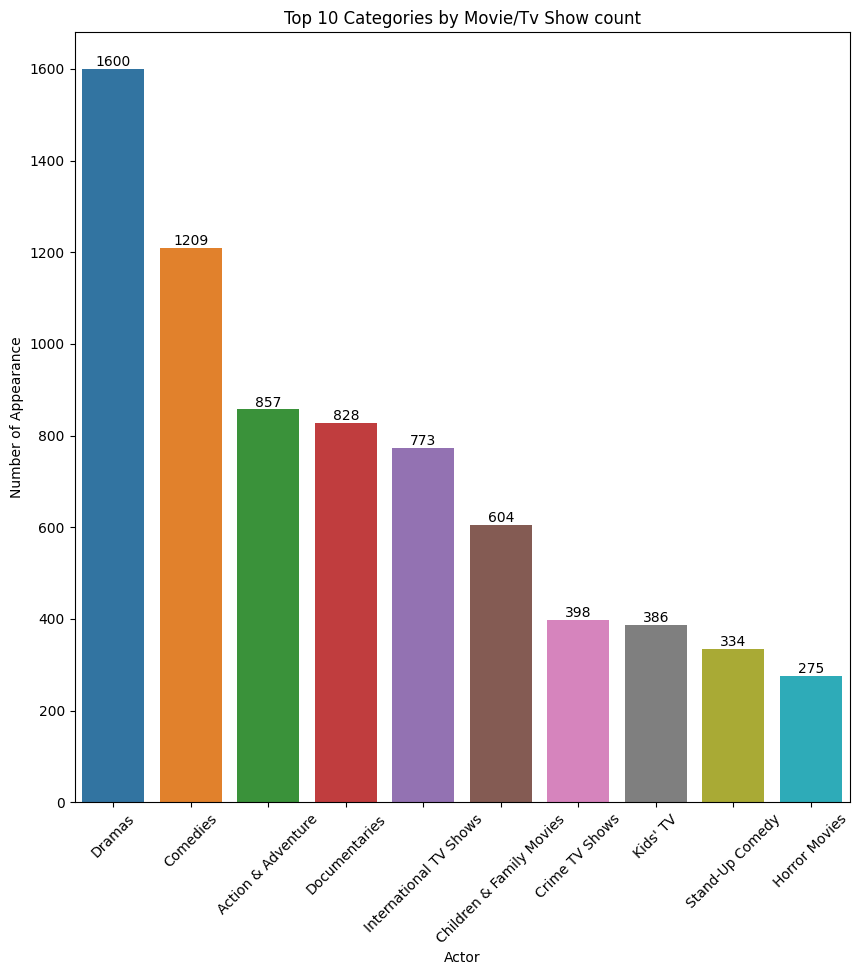

In [ ]:
plt.figure(figsize=(10,10))
bar_plot3 = sns.barplot(x=top_10_listed.index,y=top_10_listed.values)
plt.xticks(rotation=45)
plt.xlabel('Actor')
plt.ylabel('Number of Appearance')
plt.title('Top 10 Categories by Movie/Tv Show count')

for index, value in enumerate(top_10_listed.values):
  bar_plot3.text(index,value,str(value),ha='center',va='bottom')

plt.show()

In [ ]:
# Movies and TV shows Over Time
df_movies = df[df['type'] == "Movie"]
df_tv_shows = df[df['type'] == "TV Show"]

In [ ]:
movies_count = df_movies['year'].value_counts().sort_index()
tv_show_count = df_tv_shows['year'].value_counts().sort_index()

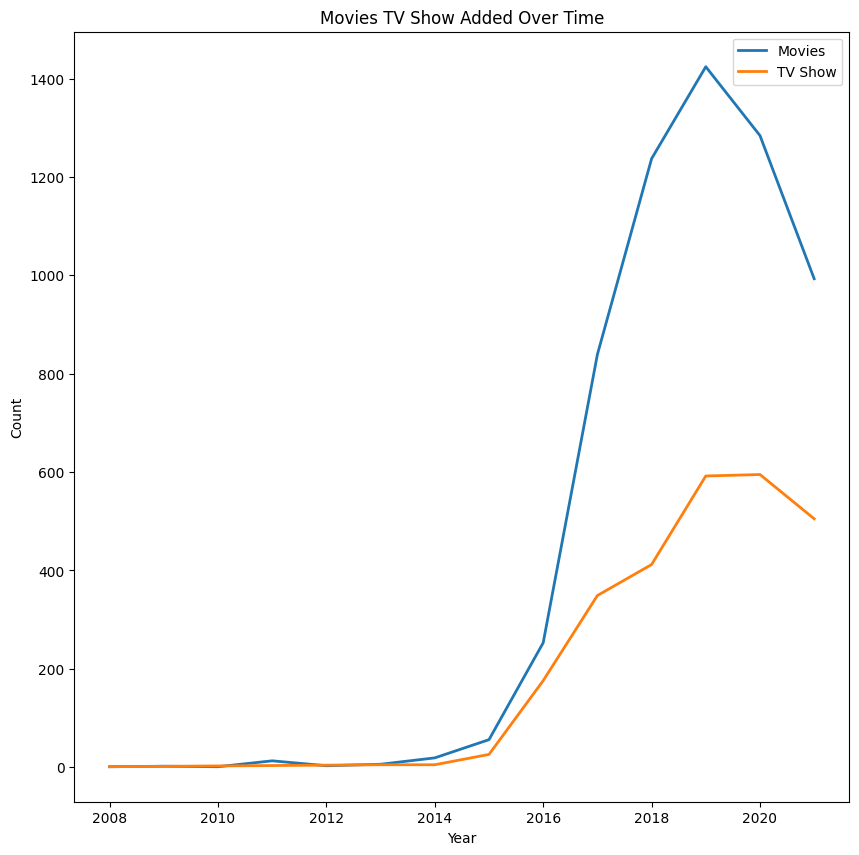

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(movies_count.index,movies_count.values,label='Movies',linewidth=2)
plt.plot(tv_show_count.index,tv_show_count.values,label='TV Show',linewidth=2)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Movies TV Show Added Over Time')
plt.legend()
plt.show()

In [ ]:
# Content Added by Month
df.head(1)

,show_id,type,title,date_added,release_year,rating,duration,description,month,month_name,year,cast_new,country_new,director_new,listed_in_new
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",9,September,2021,Not Found,United States,Kirsten Johnson,Documentaries


In [ ]:
monthly_counts = df['month_name'].value_counts()

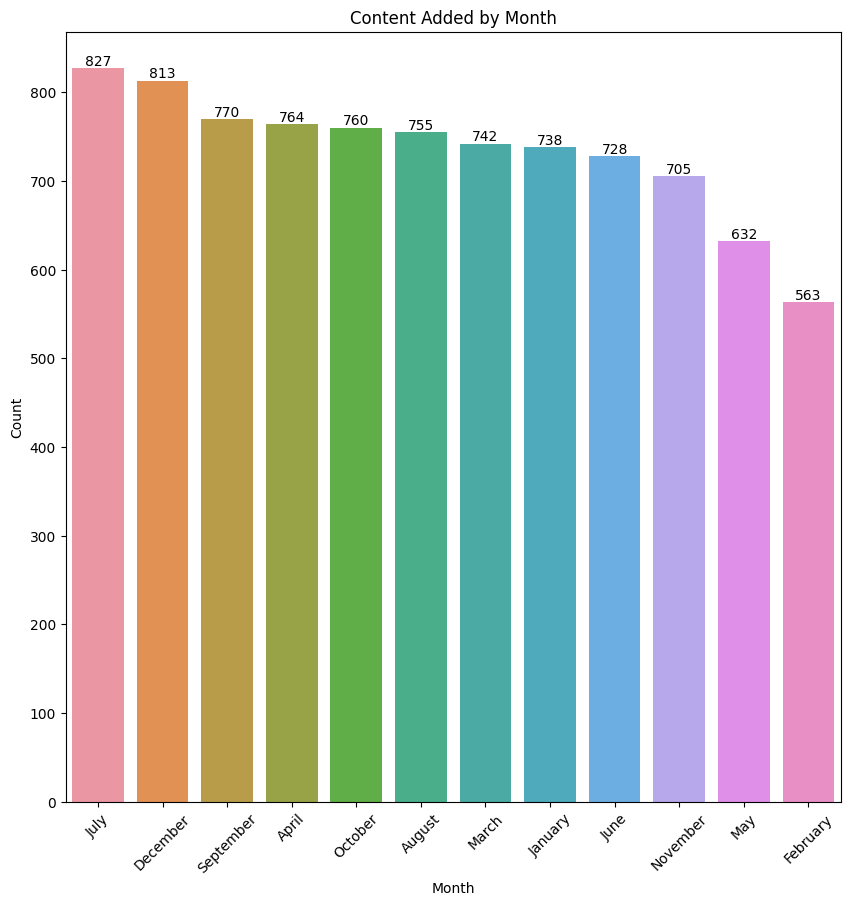

In [ ]:
plt.figure(figsize=(10,10))
bar_plot4 = sns.barplot(x=monthly_counts.index,y=monthly_counts.values)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Added by Month')

for index,value in enumerate(monthly_counts.values):
  bar_plot4.text(index,value,str(value),ha='center',va='bottom')

plt.xticks(rotation=45)
plt.show()

In [ ]:
# count the occurance to visualize the ratings
rating_counts = df['rating'].value_counts()

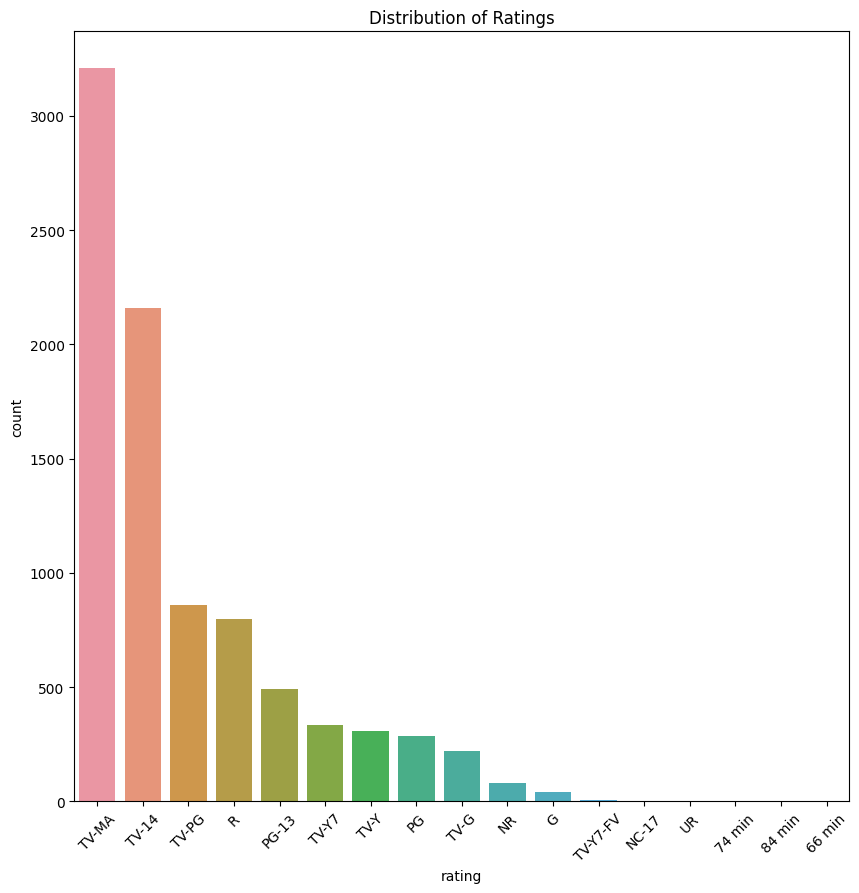

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=rating_counts.index,y=rating_counts.values)
plt.xlabel('rating')
plt.ylabel('count')
plt.title('Distribution of Ratings')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df['listed_in_new'].value_counts()

Dramas                          1599
Comedies                        1209
Action & Adventure               857
Documentaries                    828
International TV Shows           772
Children & Family Movies         604
Crime TV Shows                   398
Kids' TV                         386
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 251
Docuseries                       220
Anime Series                     175
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         66
Thrillers                         65
Movies                            57
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Independent Movies                20
Classic & Cult TV                 20
Music & Musicals                  18
T

In [61]:
genres = pd.DataFrame(index=df['listed_in_new'],columns=df['listed_in_new'],dtype=float)

In [62]:
genres.fillna(0,inplace=True)

In [66]:
# for _,row in df.iterrows():
#   listed_in = row['listed_in_new'].split(', ')
#   for genre1 in listed_in:
#     for genre2 in listed_in:
#       genres.at[genre1,genre2] += 1

In [72]:
# Distribution of movie lenght and TV Show episode Counts
moveie_len = df_movies['duration'].str.extract('(\d+)',expand=False).astype(int)
tv_show_len = df_tv_shows['duration'].str.extract('(\d+)',expand=False).astype(int)

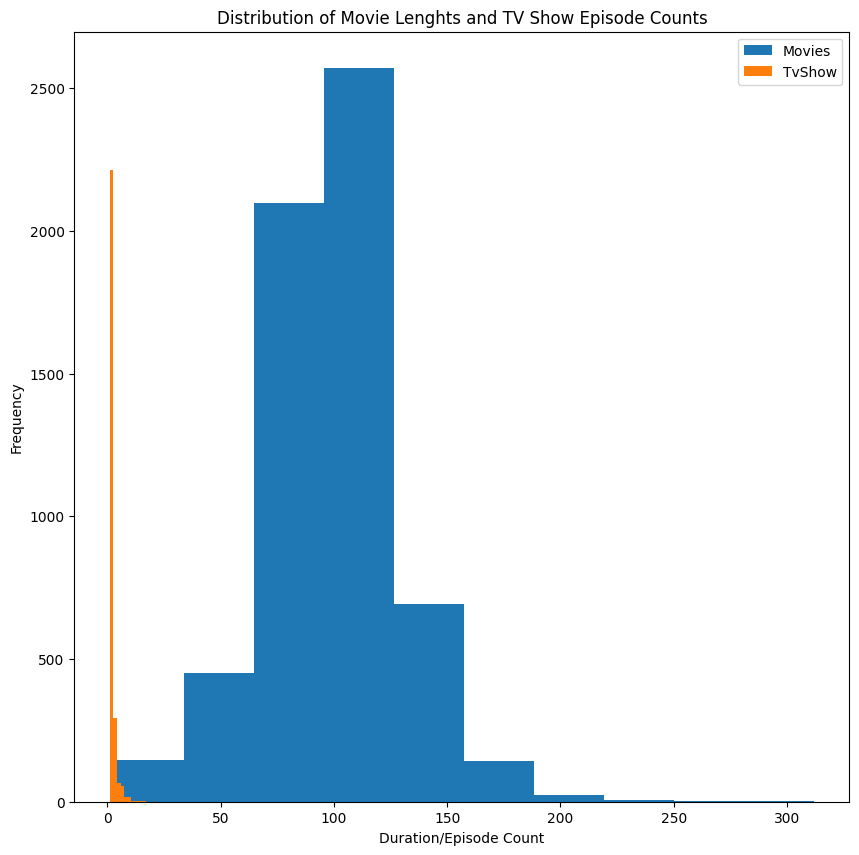

In [77]:
plt.figure(figsize=(10,10))
plt.hist(moveie_len,label='Movies',bins=10)
plt.hist(tv_show_len,label='TvShow',bins=10)
plt.xlabel('Duration/Episode Count')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Lenghts and TV Show Episode Counts')
plt.legend()
plt.show()

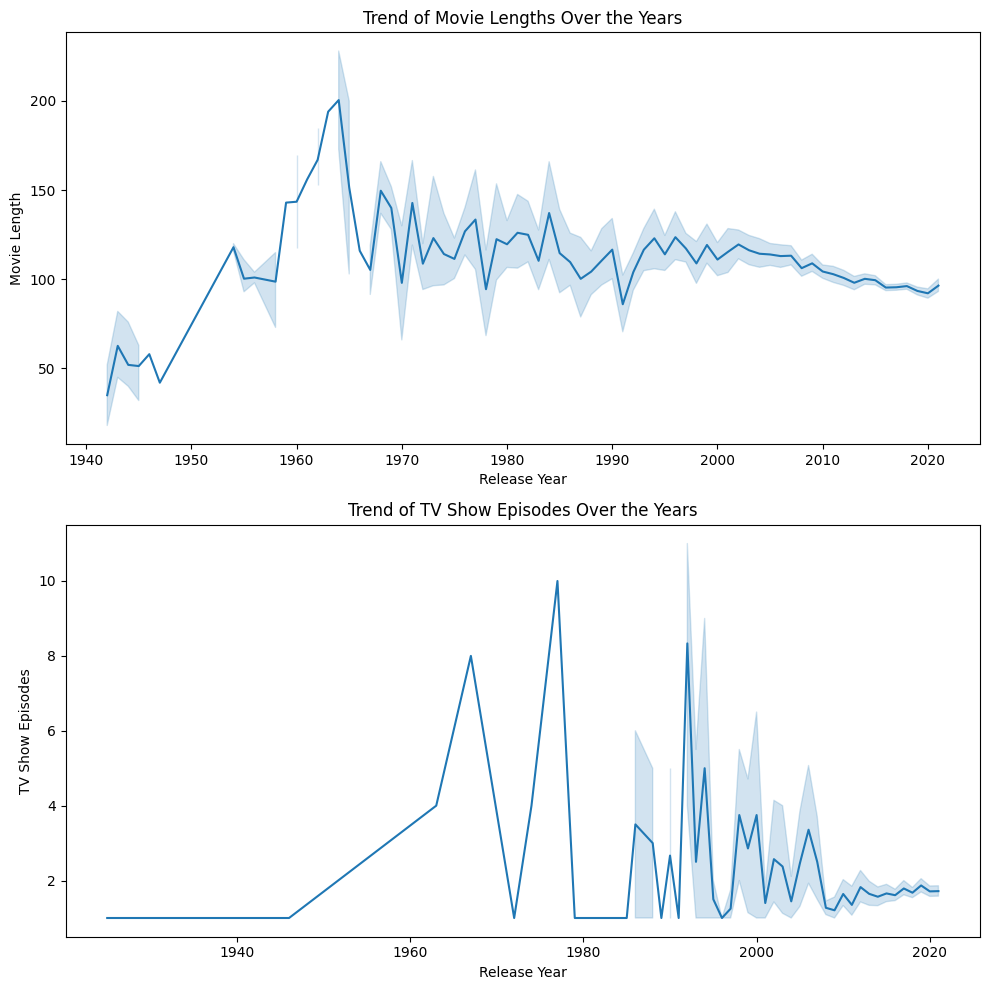

In [83]:
# The Trend of Movies/TV Show Lenght OVer The Years
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sns.lineplot(data=df_movies,x='release_year',y=moveie_len)
plt.xlabel('Release Year')
plt.ylabel('Movie Length')
plt.title('Trend of Movie Lengths Over the Years')


plt.subplot(2, 1, 2)
sns.lineplot(data=df_tv_shows, x='release_year', y=tv_show_len)
plt.xlabel('Release Year')
plt.ylabel('TV Show Episodes')
plt.title('Trend of TV Show Episodes Over the Years')
plt.tight_layout()
plt.show()